In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [4]:
df=pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [5]:
df.to_csv("canada_per_capita_income.csv", index=False)

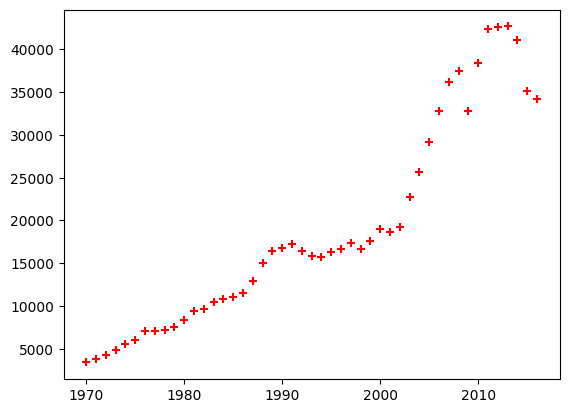

In [6]:
plt.scatter(df.year,df['per capita income (US$)'], color='Red', marker='+')

In [7]:
reg= linear_model.LinearRegression()
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [8]:
a = reg.predict([[2019]])
reg
print(a)

[40460.22901919]


d:\Data Analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
reg.coef_

array([828.46507522])

In [10]:
reg.intercept_

np.float64(-1632210.7578554575)

In [11]:
df=pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
# df.bedrooms.median()
import math
median_bedrooms= math.floor(df.bedrooms.median())
median_bedrooms

4

In [13]:
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [14]:
r=linear_model.LinearRegression()
r.fit(df[['area','bedrooms','age']],df.price) 

LinearRegression()

In [15]:
r.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [16]:
r.intercept_

np.float64(221323.0018654043)

In [17]:
r.predict([[3000,3,40]])

d:\Data Analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [18]:
hiring=pd.read_csv('hiring.csv')
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [19]:
hiring['test_score(out of 10)']= hiring['test_score(out of 10)'].fillna(hiring['test_score(out of 10)'].median())
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [20]:
hiring['experience']= hiring['experience'].fillna('zero')
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [21]:
hiring['experience']= hiring['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x,str) else x)
hiring['experience']= hiring['experience'].fillna(hiring['experience'].median())
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [22]:
re=linear_model.LinearRegression()
re.fit(hiring[['experience','test_score(out of 10)', 'interview_score(out of 10)']],hiring['salary($)'])

LinearRegression()

In [23]:
re.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [24]:
re.intercept_

np.float64(17737.263464337688)

In [25]:
re.predict([[10,10,10]])

d:\Data Analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86376.27365357])

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.
